In [1]:
import pandas as pd

data = pd.read_spss(r'C:\Users\zolotarev\Downloads\customer_dbase.sav')
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,callid,callwait,forward,confer,ebill,hourstv,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,Zone 1,"50,000-249,999",Female,20.0,18-24,September,15.0,Some college,Managerial and Professional,...,No,Yes,Yes,Yes,No,13.0,No,No,Yes,No
1,0648-AIPJSP-UVM,Zone 5,"< 2,500",Male,22.0,18-24,May,17.0,College degree,Sales and Office,...,Yes,No,Yes,No,Yes,18.0,Yes,No,No,No
2,5195-TLUDJE-HVO,Zone 3,"2,500-9,999",Female,67.0,>65,June,14.0,High school degree,Sales and Office,...,No,No,No,No,No,21.0,Yes,No,No,No
3,4459-VLPQUH-3OL,Zone 4,"10,000-49,999",Male,23.0,18-24,May,16.0,Some college,Sales and Office,...,No,No,No,No,Yes,26.0,Yes,Yes,No,No
4,8158-SMTQFB-CNO,Zone 2,"50,000-249,999",Male,26.0,25-34,July,16.0,Some college,Sales and Office,...,Yes,Yes,Yes,Yes,No,27.0,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,Zone 2,"50,000-249,999",Male,68.0,>65,January,10.0,Did not complete high school,Managerial and Professional,...,No,No,No,No,No,19.0,Yes,No,No,No
4996,4699-LEPCCE-3UD,Zone 3,"10,000-49,999",Male,51.0,50-64,May,14.0,High school degree,Managerial and Professional,...,Yes,Yes,Yes,Yes,No,14.0,No,No,No,No
4997,8485-LLUICH-CVV,Zone 4,"< 2,500",Male,75.0,>65,August,17.0,College degree,Managerial and Professional,...,Yes,Yes,Yes,Yes,No,16.0,Yes,No,No,No
4998,9325-URAAUT-7FA,Zone 1,"> 250,000",Male,47.0,35-49,December,19.0,College degree,Sales and Office,...,No,No,No,No,Yes,24.0,Yes,No,No,No


# Task Description

* C & RT model


Perform audit of your variables in the dataset.	

Check whether the data set is balanced by categories of the target variable. If not then balance it.	
Build model: (a) on the whole set of predictors and (b) on the subset of predictors if your algorithm has a predictors selection feature.

Analyze the results:	
* Assess approptiate measures of godness of fit
* Estimate general accuracy of the model on the training and testing sets
* ~~Analyze residuals~~
* Analyze model's selectivity based on Gains or ROC Curve chart. Provide interpretation comments for one particular point of the chart.


## Check of balance for target variable

<AxesSubplot:>

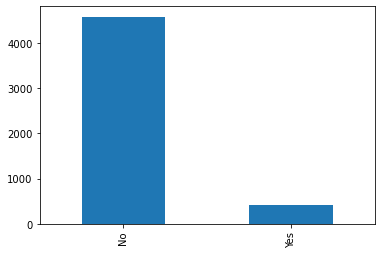

In [2]:
data['response_01'].value_counts().plot(kind='bar')

We can observe that distribution of classes in target variable is quite imbalanced. This problem may highly affect model quality. Let's reduce number of "No" responses (it will be performed in 2 ways: 1 - that was discussed during lectures, 2 - self-learned method that was learned during other courses on Faculty of Computer Sciences in HSE)

###  Balancing classes for whole dataset

In [3]:
len_no = len(data[data['response_01']=='No'])
len_yes = len(data[data['response_01']=='Yes'])
p = min(len_no/len_yes, len_yes/len_no)

In [4]:
from scipy.stats import bernoulli
data['rand'] = 0
data['rand'] = bernoulli.rvs(size=len(data), p=p)
data_reduced = data[(data['response_01']=='Yes') | ((data.response_01=='No') &(data.rand==1))]

Let's choose all variables listed in Task Assignment and encode categorical variables as dummies:

In [5]:
X = data_reduced[['ed', 'address', 'equip', 'ebill', 'confer', 
                  'equipten', 'forward', 'callwait', 'callcard']]
X = pd.get_dummies(X)
data_reduced['response_01'] = data_reduced['response_01'].apply(lambda x: 1 if x =='Yes' else 0)
y = data_reduced.response_01
X

<ipython-input-5-be1fc59462d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_reduced['response_01'] = data_reduced['response_01'].apply(lambda x: 1 if x =='Yes' else 0)


,ed,address,equipten,equip_No,equip_Yes,ebill_No,ebill_Yes,confer_No,confer_Yes,forward_No,forward_Yes,callwait_No,callwait_Yes,callcard_No,callcard_Yes
3,16.0,3.0,0.00,1,0,0,1,1,0,1,0,1,0,0,1
8,12.0,21.0,0.00,1,0,1,0,1,0,1,0,1,0,0,1
18,11.0,5.0,0.00,1,0,1,0,0,1,0,1,0,1,0,1
25,14.0,38.0,2874.15,0,1,0,1,0,1,0,1,0,1,0,1
38,22.0,20.0,1740.25,0,1,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,16.0,43.0,0.00,1,0,1,0,0,1,0,1,0,1,0,1
4962,15.0,2.0,555.70,0,1,0,1,1,0,1,0,1,0,1,0
4981,9.0,21.0,0.00,1,0,1,0,0,1,0,1,0,1,0,1
4983,15.0,21.0,0.00,1,0,1,0,1,0,1,0,1,0,1,0


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=11102021)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((622, 15), (208, 15), (622,), (208,))

# Building model

Now we prepared all data to make a classification model. Let's try DecisionTreeClassifier from sklearn library to make C&RT model of binary trees. Firstly, I will make cross-validation to find optimal stop-criterion of building tree:

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_searcher = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid={
        # your code here
        'min_samples_split':[2, 3, 5, 10, 20, 25, 50, 75, 100], 
        'min_samples_leaf': [2, 3, 4, 5, 15, 20, 50, 75, 100], 
        'max_depth':[1, 2, 3, 4, 5, 8, 10, 15],
        
    },
    cv=5
)

grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 8, 10, 15],
                         'min_samples_leaf': [2, 3, 4, 5, 15, 20, 50, 75, 100],
                         'min_samples_split': [2, 3, 5, 10, 20, 25, 50, 75,
                                               100]})

In [8]:
print('best_score_ : ', grid_searcher.best_score_)
print('accuracy : ', grid_searcher.score(X_val, y_val))
grid_searcher.best_params_

best_score_ :  0.6093161290322582
accuracy :  0.6394230769230769


{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2}

In [33]:
crt_clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=2)
crt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50)

## Goodness of fit & General accuracy

We should make classification report to see precision, recall and f1-score for our classifier:

In [34]:
from sklearn.metrics import classification_report

y_pred = crt_clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       306
           1       0.64      0.67      0.66       316

    accuracy                           0.64       622
   macro avg       0.64      0.64      0.64       622
weighted avg       0.64      0.64      0.64       622



We can observe that even on train data we have no perfect accuracy of classification task. It seems that cross-validation prevent Decision Tree from overfitting.

In [35]:
y_pred = crt_clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       106
           1       0.61      0.75      0.67       102

    accuracy                           0.64       208
   macro avg       0.65      0.64      0.64       208
weighted avg       0.65      0.64      0.64       208



We can observe that on test data F1-score is better for "Yes" answer in target variable. Possibly Decision Tree didn't catch some patterns of alternative category "No".

Let's also build confusion matrix to understand results we get better:

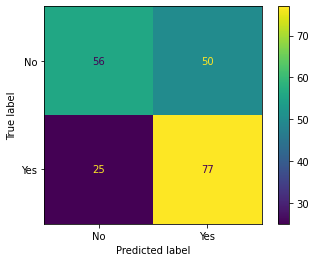

In [11]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot()

Let's draw architecture of best decision tree that we get during cross-validation process:

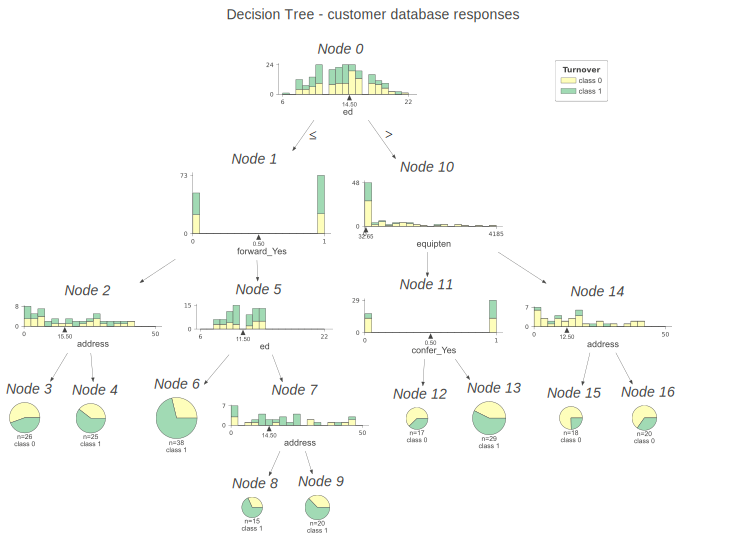

In [14]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(crt_clf, X_val, y_val,
                target_name="Turnover",
                feature_names=X_val.columns,
               title="Decision Tree - customer database responses",
               show_node_labels = True)
viz

Now let's evaluate goodness of fit by building histogram of scorings coloured by the actual categories. Let's use predicted probabilities to display it. Start with train data:

In [23]:
y_pred_proba = pd.DataFrame(crt_clf.predict_proba(X_train))
goodness = pd.concat([y_train.reset_index().response_01, y_pred_proba], axis=1)

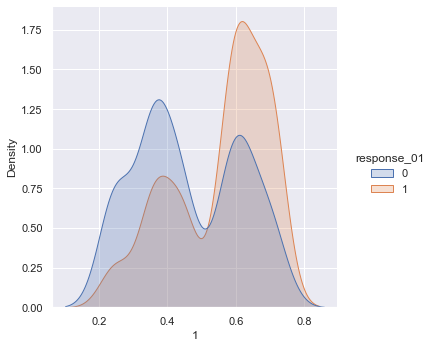

In [28]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20, 15)})
sns.displot(goodness, x=1, hue="response_01", kind="kde", fill=True)

Seems that classification was performed quite well. Let's turn to test data:

In [30]:
y_pred_proba = pd.DataFrame(crt_clf.predict_proba(X_val))
goodness = pd.concat([y_val, y_pred_proba], axis=1)

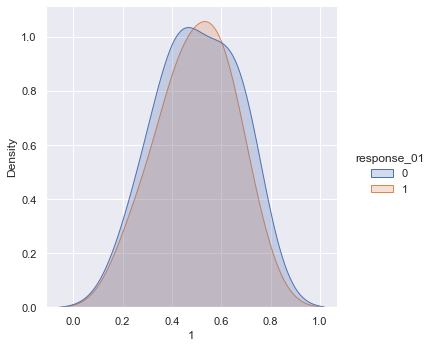

In [31]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20, 15)})
sns.displot(goodness, x=1, hue="response_01", kind="kde", fill=True)

## Model's selectivity

Analyze model's selectivity based on Gains or ROC Curve chart. Provide interpretation comments for one particular point of the chart.

Let's plot Gains chart:

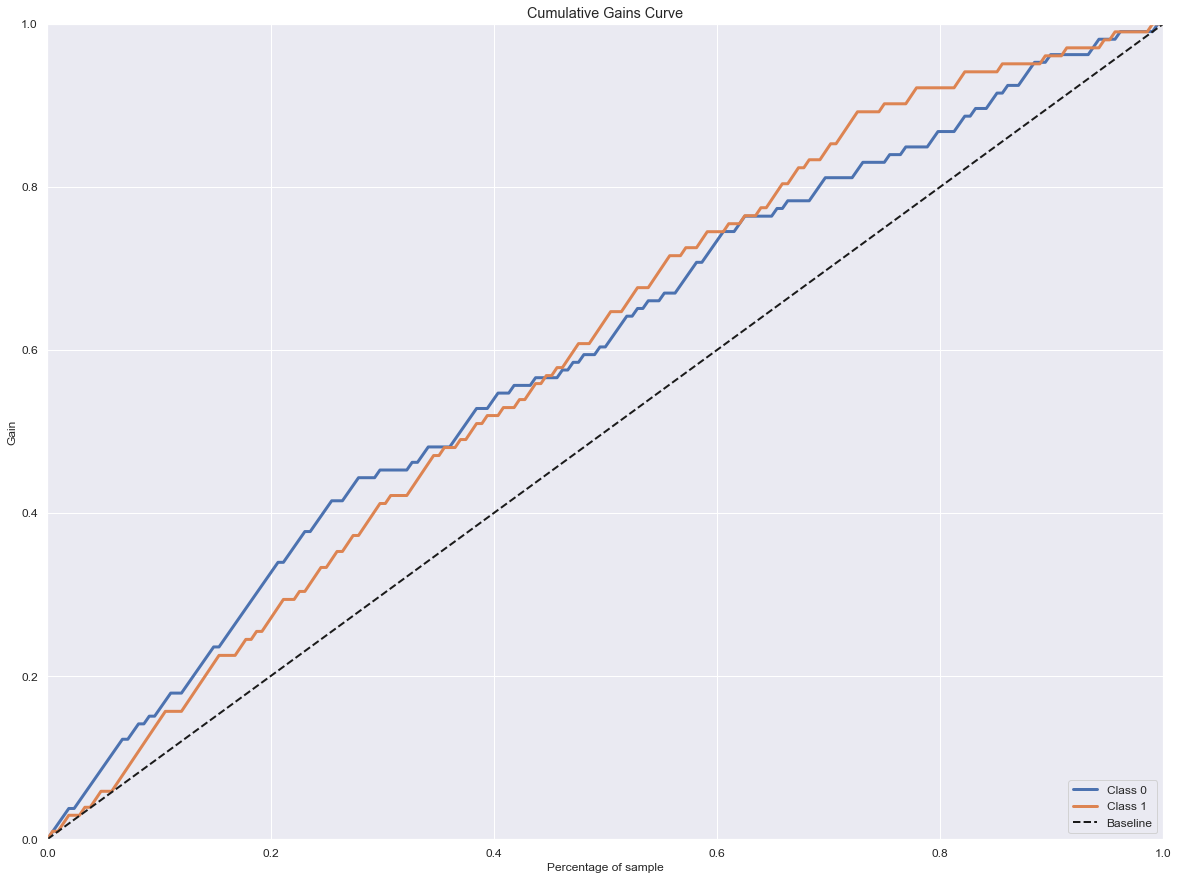

In [42]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_cumulative_gain(y_val, y_pred_proba)
plt.show()

Now it's time to plot ROC curve. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.  It can also be thought of as a plot of the power as a function of the Type I Error of the decision rule (when the performance is calculated from just a sample of the population, it can be thought of as estimators of these quantities). The ROC curve is thus the sensitivity or recall as a function of fall-out.

ROC Curve plot:

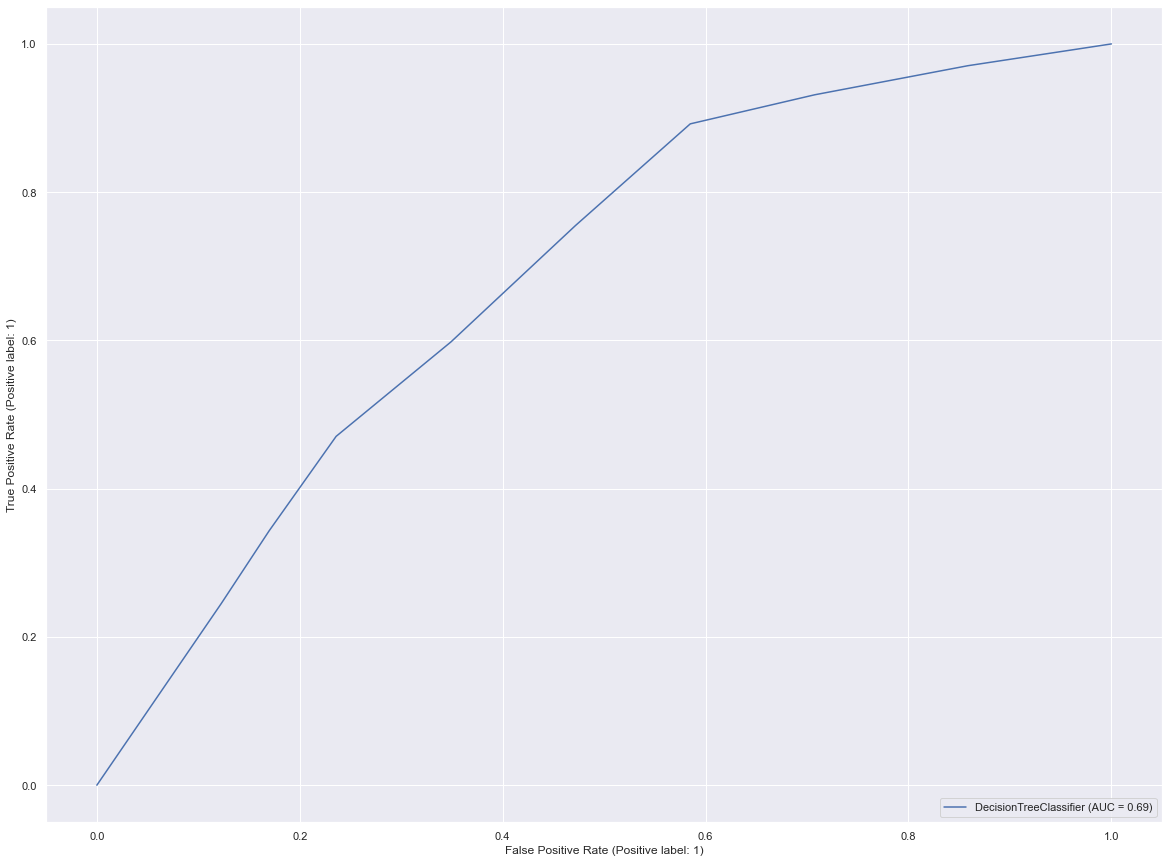

In [45]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(crt_clf, X_val, y_val)
plt.show()

We can observe that Area under curve (AUC) equals 0.69. That's pretty similar with macro F1-score of classifier. Overall, this value is quite close to 0.5, so classification quality is not perfect. We can assume that usage of Random Forest and Gradient Boosting may significantly increase accuracy of model.